In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
train0 = pd.read_pickle('D:\\CS760\\pj\\train_set_0.pkl')
train1 = pd.read_pickle('D:\\CS760\\pj\\train_set_1.pkl')
train2 = pd.read_pickle('D:\\CS760\\pj\\train_set_2.pkl')
train_set = pd.concat([train0,train1], ignore_index=True)
training = pd.concat([train_set,train2], ignore_index=True)

In [33]:
test = pd.read_pickle('D:\\CS760\\pj\\test_set.pkl')
testset = test.sample(frac=1,random_state=44)

In [40]:
testset

,channelGrouping,fullVisitorId,visitStartTime,device_browser,device_operatingSystem,geoNetwork_country,totals_hits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactionRevenue,totals_transactions,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_isTrueDirect
122321,Organic Search,1566750340501400580,1529642879,Chrome,Android,United States,4,4,1,150,0.0,0,True,0,False
78539,Organic Search,3426200385335200958,1531500688,Opera,Windows,France,1,1,1,0,0.0,0,True,0,False
79358,Organic Search,6477516731119064614,1531934062,Safari,iOS,United States,1,1,1,0,0.0,0,True,0,False
178679,Organic Search,7735654561858167578,1527871171,Chrome,Android,United States,6,5,2,72,0.0,0,True,0,False
153760,Direct,4499357605732716440,1526500945,Chrome,Windows,United States,1,1,1,0,0.0,0,True,0,True
33702,Direct,5554752613232258520,1530572009,Chrome,Macintosh,United States,6,6,2,83,0.0,0,True,0,True
55496,Social,6588283121544410900,1532360826,Chrome,Windows,Thailand,1,1,1,0,0.0,0,True,0,False
175367,Referral,1931558532998830413,1526148547,Chrome,Android,Thailand,6,4,1,78,0.0,0,True,0,False
47554,Social,8131718416881710593,1529005054,Firefox,Macintosh,Brazil,1,1,1,0,0.0,0,True,0,False
160067,Organic Search,9166034917849320057,1538138790,Chrome,Windows,United Kingdom,6,6,1,101,0.0,0,True,0,True


In [3]:
device = ['Chrome','Firefox','Opera','Safari','Edge','Android Browser','Seznam','Samsung Internet','Internet Explorer',
          'UC Browser','YaBrowser','Amazon Silk','BlackBerry','Coc Coc','Mozilla','Maxthon', 'Nintendo Browser',
         'Playstation Vita Browser', 'Nokia Browser','MRCHROME','SeaMonkey','Puffin']
training['device_browser'].replace({'Opera Mini':'Opera', 'Safari (in-app)':'Safari', 'Android Webview':'Android Browser',
                                   'Mozilla Compatible Agent':'Mozilla'}, inplace=True)
training.loc[~training['device_browser'].isin(device),'device_browser']='others'

In [4]:
trainset = training.sample(frac=3/4,random_state=44)
validset = training.loc[~training.index.isin(trainset.index), :]

In [5]:
class ThreeLayerNet(nn.Module):

    def __init__(self, D_in, H1, H2, drop):
        super(ThreeLayerNet, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, 1)
        self.drop = nn.Dropout(drop)

    def forward(self, x):
        hidden_layer1 = self.drop(F.softmax(self.linear1(x.float())) )
        
        hidden_layer2 = self.drop(F.softmax(self.linear2(hidden_layer1)))
        y_pred = self.linear3(hidden_layer2)
        return y_pred

In [6]:
def train(model, x, y,criterion,optimizer):
    """
   train NN
    """
    model.train()
    y_pred = model(x)
    loss = criterion(y_pred.float(), y.float())
    print(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss.item()

In [7]:
def valid(model, x_valid, y_valid,criterion):
    """
    test NN
    """
    model.eval()
    y_pred = model(x_valid)
    loss = criterion(y_pred.float(), y_valid.float())
    #print(loss.item())
    return loss.item()

In [8]:
def ordinal(data):
    categorical = ['channelGrouping','device_browser','device_operatingSystem','geoNetwork_country']
    boolean = ['trafficSource_adwordsClickInfo.isVideoAd','trafficSource_isTrueDirect']
    for col in categorical:
        attributes = data[col].unique()
        d = dict(enumerate(attributes,start=1))
        new = dict((v,k) for k,v in d.items())
        data[col].replace(new,inplace = True)
    for col in boolean:
        data[col].replace({True:1,False:0},inplace=True)
    return data

In [9]:
def standardize(TrainSet,TestSet):
    standard=np.array(TrainSet)
    standard_test=np.array(TestSet)
    mean_array=np.mean(standard,axis=0)
    stdev=np.std(standard,axis=0,ddof=1)
    if stdev==0:
        stdev=1
    outcome = (standard_test - mean_array) / stdev
    return outcome

In [10]:
def standard(data):
    numerical = ['totals_hits','totals_pageviews','totals_sessionQualityDim','totals_timeOnSite',
                 'totals_transactionRevenue','totals_transactions']
    for col in numerical:
        data[col]=standardize(data[col],data[col])
    return data

In [11]:
def GetData(A, B):
    dataset1 = A.copy()
    dataset2 = B.copy()
    
    ID = dataset1[['fullVisitorId']]
    # y = log(1+revenue)
    dataset1['totals_transactionRevenue'] = np.log(dataset1['totals_transactionRevenue']+1)
    dataset2['totals_transactionRevenue'] = np.log(dataset2['totals_transactionRevenue']+1)
    
    # ordinal encoding categorical features  
    dataset1 = ordinal(dataset1)
    
    # standardize numerical features
    numerical = ['totals_hits','totals_pageviews','totals_sessionQualityDim','totals_timeOnSite',
                 'totals_transactionRevenue','totals_transactions']
    for col in numerical:
        #standardize dataset1 based on dataset2
        dataset1[col]=standardize(dataset2[col],dataset1[col]) 
    # load y
    train_y = dataset1[['totals_transactionRevenue']]
    
    y = torch.tensor(train_y.values)
    # load x
    train_x = dataset1.drop(['totals_transactionRevenue','fullVisitorId','visitStartTime'], axis=1)
    x = torch.tensor(train_x.to_numpy(dtype=np.float))   
    return x,y,ID

In [12]:
train_x, train_y, train_ID = GetData(trainset,trainset)
valid_x, valid_y, valid_ID = GetData(validset,trainset)

In [36]:
test_x, test_y, test_ID = GetData(testset,trainset)

In [13]:
model1 = ThreeLayerNet(train_x.shape[1], 8 , 8, 0.5)
optimizer = torch.optim.Adam(model1.parameters(), lr=0.1)
criterion = torch.nn.MSELoss()
loss_train=[]
for i in range(100):
    print(i,' ', end='')
    loss_train.append(train(model1,train_x,train_y,criterion,optimizer))
    
model1_loss = valid(model1, valid_x, valid_y,criterion)

0  

C:\Users\toycs\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\toycs\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


1.0438904762268066
1  1.015986680984497
2  1.0253914594650269
3  1.0113071203231812
4  0.9987692832946777
5  0.9987363219261169
6  1.0016274452209473
7  0.9981057643890381
8  0.991288959980011
9  0.9865125417709351
10  0.9843850135803223
11  0.9802462458610535
12  0.9732210040092468
13  0.9651964902877808
14  0.9590785503387451
15  0.9543595314025879
16  0.9457226395606995
17  0.9404217600822449
18  0.9298192262649536
19  0.9286388754844666
20  0.9200807213783264
21  0.9099580645561218
22  0.8978782892227173
23  0.8879606127738953
24  0.879911482334137
25  0.8701579570770264
26  0.8615167737007141
27  0.8514950275421143
28  0.8417904376983643
29  0.8393589854240417
30  0.8281528949737549
31  0.8176045417785645
32  0.814231812953949
33  0.8035258054733276
34  0.7996625304222107
35  0.7927554249763489
36  0.7820737957954407
37  0.7769490480422974
38  0.7662829756736755
39  0.7629860639572144
40  0.7561126351356506
41  0.739784300327301
42  0.7401991486549377
43  0.7375090718269348
44  0.

In [14]:
model2 = ThreeLayerNet(train_x.shape[1], 4 , 4, 0.5)
optimizer = torch.optim.Adam(model2.parameters(), lr=0.1)
criterion = torch.nn.MSELoss()
loss_train2=[]

for i in range(100):
    print(i,' ', end='')
    loss_train2.append(train(model2,train_x,train_y,criterion,optimizer))

model2_loss = valid(model2, valid_x, valid_y,criterion)

0  

C:\Users\toycs\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\toycs\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


1.1328140497207642
1  1.0253446102142334
2  1.0343416929244995
3  1.044339895248413
4  1.0333316326141357
5  1.015310287475586
6  1.0037845373153687
7  1.0031694173812866
8  1.0094460248947144
9  1.0132887363433838
10  1.0109596252441406
11  1.005225658416748
12  1.0008872747421265
13  1.0000708103179932
14  1.0028588771820068
15  1.004997968673706
16  1.004663109779358
17  1.001602053642273
18  0.9977932572364807
19  0.9949272274971008
20  0.993903636932373
21  0.9932824969291687
22  0.9918879866600037
23  0.9885987639427185
24  0.9836311936378479
25  0.9787462949752808
26  0.9764012098312378
27  0.9737291932106018
28  0.9699062705039978
29  0.9666047692298889
30  0.9627777338027954
31  0.9577508568763733
32  0.9530699253082275
33  0.9463473558425903
34  0.9405286908149719
35  0.9359404444694519
36  0.9291034936904907
37  0.9229068160057068
38  0.9175726771354675
39  0.9116373658180237
40  0.9061768651008606
41  0.8986881971359253
42  0.8918344378471375
43  0.8863515853881836
44  0.87

In [15]:
model3 = ThreeLayerNet(train_x.shape[1], 16 , 16, 0.5)
optimizer = torch.optim.Adam(model3.parameters(), lr=0.1)
criterion = torch.nn.MSELoss()
loss_train3=[]

for i in range(100):
    print(i,' ', end='')
    loss_train3.append(train(model3,train_x,train_y,criterion,optimizer))

model3_loss = valid(model3, valid_x, valid_y,criterion)

0  

C:\Users\toycs\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\toycs\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


1.0199042558670044
1  1.0081194639205933
2  1.0089083909988403
3  0.9993252158164978
4  0.9959472417831421
5  0.9957252144813538
6  0.9899164438247681
7  0.9817532300949097
8  0.9741512537002563
9  0.9687023162841797
10  0.9610115885734558
11  0.9490903615951538
12  0.9411760568618774
13  0.9362077713012695
14  0.9215680956840515
15  0.9167245626449585
16  0.9009853601455688
17  0.8914401531219482
18  0.8826333284378052
19  0.8690822720527649
20  0.8492597341537476
21  0.8453327417373657
22  0.8361293077468872
23  0.8093366622924805
24  0.7976970672607422
25  0.7957085371017456
26  0.7593441605567932
27  0.766633152961731
28  0.7331334352493286
29  0.7357029318809509
30  0.7393180727958679
31  0.6892115473747253
32  0.7071622014045715
33  0.708124041557312
34  0.6733220219612122
35  0.6839235424995422
36  0.6636603474617004
37  0.6463350057601929
38  0.6160826683044434
39  0.6283126473426819
40  0.6071944832801819
41  0.5899363160133362
42  0.5922151803970337
43  0.5698731541633606
44 

In [16]:
model4 = ThreeLayerNet(train_x.shape[1], 32, 32, 0.5)
optimizer = torch.optim.Adam(model4.parameters(), lr=0.1)
criterion = torch.nn.MSELoss()
loss_train4=[]

for i in range(100):
    print(i,' ', end='')
    loss_train4.append(train(model4,train_x,train_y,criterion,optimizer))

model4_loss = valid(model4, valid_x, valid_y,criterion)

0  

C:\Users\toycs\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\toycs\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


1.0006574392318726
1  1.0346823930740356
2  0.9951002597808838
3  1.0014439821243286
4  1.0101064443588257
5  0.9975197911262512
6  0.9806743264198303
7  0.9732670187950134
8  0.9711223840713501
9  0.9621989130973816
10  0.9440231919288635
11  0.9265540838241577
12  0.9146953821182251
13  0.901551365852356
14  0.8948553800582886
15  0.8882318139076233
16  0.850562334060669
17  0.8480250239372253
18  0.8383939266204834
19  0.8173440098762512
20  0.7856919765472412
21  0.7618317008018494
22  0.7609010338783264
23  0.731745719909668
24  0.7251760363578796
25  0.6979379653930664
26  0.6781507134437561
27  0.6589305400848389
28  0.6395258903503418
29  0.6211893558502197
30  0.6081230044364929
31  0.5897058844566345
32  0.5753557085990906
33  0.5554430484771729
34  0.5447155237197876
35  0.5277320742607117
36  0.5303024053573608
37  0.5147378444671631
38  0.502842128276825
39  0.4889654517173767
40  0.4840834438800812
41  0.4645489454269409
42  0.464321106672287
43  0.4432096481323242
44  0.

Text(0.5, 1.0, '3 layer network: nodes number VS loss')

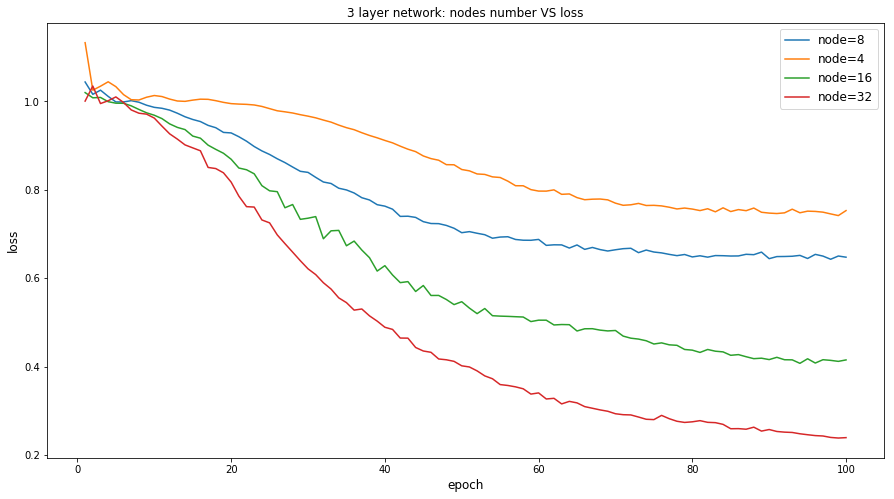

In [18]:
fig,ax = plt.subplots(figsize=(15,8))
ax.plot(range(1,101),loss_train,label = 'node=8')
ax.plot(range(1,101),loss_train2,label = 'node=4')
ax.plot(range(1,101),loss_train3,label = 'node=16')
ax.plot(range(1,101),loss_train4,label = 'node=32')
ax.set_xlabel('epoch',fontsize='large')
ax.set_ylabel('loss',fontsize='large')
ax.legend(fontsize='large')
ax.set_title('3 layer network: nodes number VS loss')

In [19]:
class ThreeLayerNet2(nn.Module):

    def __init__(self, D_in, H1, H2):
        super(ThreeLayerNet2, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, 1)
    
    def forward(self, x):
        hidden_layer1 = F.softmax(self.linear1(x.float())) 
        hidden_layer2 = F.softmax(self.linear2(hidden_layer1))
        y_pred = self.linear3(hidden_layer2)
        return y_pred

In [20]:
model5 = ThreeLayerNet(train_x.shape[1], 8, 8, 0.2)
optimizer = torch.optim.Adam(model5.parameters(), lr=0.1)
criterion = torch.nn.MSELoss()
loss_train5=[]

for i in range(100):
    print(i,' ', end='')
    loss_train5.append(train(model5,train_x,train_y,criterion,optimizer))
    
model5_loss = valid(model5, valid_x, valid_y,criterion)

0  

C:\Users\toycs\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\toycs\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


1.1305996179580688
1  1.0144516229629517
2  1.004348874092102
3  1.0365314483642578
4  1.0425037145614624
5  1.0252196788787842
6  1.0052229166030884
7  0.9953511953353882
8  0.9969531893730164
9  1.0039725303649902
10  1.0078668594360352
11  1.0044795274734497
12  0.9947905540466309
13  0.9833465814590454
14  0.9745720624923706
15  0.9699136018753052
16  0.9677722454071045
17  0.9629896283149719
18  0.9529266357421875
19  0.9389026165008545
20  0.9254211783409119
21  0.9143952131271362
22  0.905840277671814
23  0.8956053256988525
24  0.885025680065155
25  0.8706009984016418
26  0.8553928136825562
27  0.841846764087677
28  0.8269210457801819
29  0.8105942606925964
30  0.7929214239120483
31  0.7716293334960938
32  0.7496298551559448
33  0.7272446751594543
34  0.7083926200866699
35  0.6927652955055237
36  0.6711256504058838
37  0.6558522582054138
38  0.6412516236305237
39  0.6183342933654785
40  0.6080524325370789
41  0.5916234850883484
42  0.5759879350662231
43  0.5633242726325989
44  0

In [21]:
model6 = ThreeLayerNet(train_x.shape[1], 8, 8, 0.4)
optimizer = torch.optim.Adam(model6.parameters(), lr=0.1)
criterion = torch.nn.MSELoss()
loss_train6=[]

for i in range(100):
    print(i,' ', end='')
    loss_train6.append(train(model6,train_x,train_y,criterion,optimizer))
    
model6_loss = valid(model6, valid_x, valid_y,criterion)

0  

C:\Users\toycs\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\toycs\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


1.1028742790222168
1  1.0110644102096558
2  1.0170252323150635
3  1.0420762300491333
4  1.0369007587432861
5  1.017749547958374
6  1.0037117004394531
7  1.0025746822357178
8  1.0105993747711182
9  1.0167195796966553
10  1.0148192644119263
11  1.0079785585403442
12  1.0022889375686646
13  1.0011036396026611
14  1.0041943788528442
15  1.0072176456451416
16  1.0070186853408813
17  1.0036200284957886
18  0.99985671043396
19  0.9979559183120728
20  0.9977973699569702
21  0.9976504445075989
22  0.9963009357452393
23  0.9926994442939758
24  0.9865394234657288
25  0.9825480580329895
26  0.9798899292945862
27  0.9768590927124023
28  0.9727112650871277
29  0.9672122597694397
30  0.962350606918335
31  0.9576979875564575
32  0.9520700573921204
33  0.9463016986846924
34  0.9364341497421265
35  0.9293712377548218
36  0.9187333583831787
37  0.9107014536857605
38  0.8968364596366882
39  0.8864310383796692
40  0.8803173303604126
41  0.8706693649291992
42  0.8586597442626953
43  0.8480330109596252
44  0

NameError: name 'model7' is not defined

In [23]:
model7 = ThreeLayerNet2(train_x.shape[1], 8, 8)
optimizer = torch.optim.Adam(model7.parameters(), lr=0.1)
criterion = torch.nn.MSELoss()
loss_train7=[]

for i in range(100):
    print(i,' ', end='')
    loss_train7.append(train(model7,train_x,train_y,criterion,optimizer))
    
model7_loss = valid(model7, valid_x, valid_y,criterion)

0  

C:\Users\toycs\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\toycs\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


1.0011664628982544
1  1.031120777130127
2  0.9916465878486633
3  0.9969789981842041
4  1.0021315813064575
5  0.9864525198936462
6  0.968635618686676
7  0.9584378004074097
8  0.9481193423271179
9  0.9291923642158508
10  0.9031609892845154
11  0.8778213858604431
12  0.85728919506073
13  0.834540069103241
14  0.8054829835891724
15  0.7739607095718384
16  0.7447379231452942
17  0.7173774838447571
18  0.6882669925689697
19  0.6574922800064087
20  0.6282736659049988
21  0.6004505753517151
22  0.5742291808128357
23  0.5473954677581787
24  0.5199412703514099
25  0.49392691254615784
26  0.469419926404953
27  0.44505614042282104
28  0.42032289505004883
29  0.39608389139175415
30  0.3730507791042328
31  0.35155579447746277
32  0.33005714416503906
33  0.308906614780426
34  0.2890874743461609
35  0.27027633786201477
36  0.251722514629364
37  0.2336348295211792
38  0.2168678194284439
39  0.20096208155155182
40  0.1852962076663971
41  0.17057186365127563
42  0.15705475211143494
43  0.1440289318561554

Text(0.5, 1.0, '3 layer network: dropout rate VS loss')

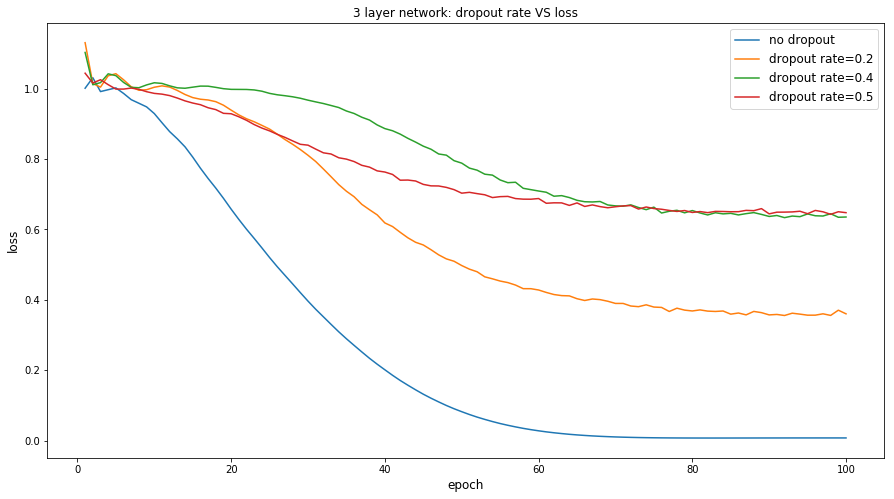

In [26]:
fig,ax = plt.subplots(figsize=(15,8))

ax.plot(range(1,101),loss_train7,label = 'no dropout')
ax.plot(range(1,101),loss_train5,label = 'dropout rate=0.2')
ax.plot(range(1,101),loss_train6,label = 'dropout rate=0.4')
ax.plot(range(1,101),loss_train,label = 'dropout rate=0.5')

ax.set_xlabel('epoch',fontsize='large')
ax.set_ylabel('loss',fontsize='large')
ax.legend(fontsize='large')
ax.set_title('3 layer network: dropout rate VS loss')

In [25]:
model8 = ThreeLayerNet2(train_x.shape[1], 32, 32)
optimizer = torch.optim.Adam(model8.parameters(), lr=0.1)
criterion = torch.nn.MSELoss()
loss_train8=[]

for i in range(100):
    print(i,' ', end='')
    loss_train8.append(train(model8,train_x,train_y,criterion,optimizer))
    
model8_loss = valid(model8, valid_x, valid_y,criterion)

0  

C:\Users\toycs\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\toycs\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


1.0173488855361938
1  1.0075371265411377
2  1.0117429494857788
3  0.9985222220420837
4  0.9942812919616699
5  0.9961143136024475
6  0.9910668134689331
7  0.9787881970405579
8  0.964842677116394
9  0.9501991271972656
10  0.9318668246269226
11  0.9085654020309448
12  0.8820700645446777
13  0.8553093075752258
14  0.8285577893257141
15  0.7996167540550232
16  0.7685612440109253
17  0.7372368574142456
18  0.706718385219574
19  0.67535799741745
20  0.6439486145973206
21  0.6130646467208862
22  0.5825145840644836
23  0.5523163676261902
24  0.5224025249481201
25  0.49303922057151794
26  0.4642910361289978
27  0.4360499680042267
28  0.40841153264045715
29  0.38166049122810364
30  0.35573938488960266
31  0.3304883539676666
32  0.30620676279067993
33  0.28286781907081604
34  0.26032590866088867
35  0.23879465460777283
36  0.2181805968284607
37  0.19843526184558868
38  0.17974917590618134
39  0.16197744011878967
40  0.1452302634716034
41  0.12958091497421265
42  0.11494465917348862
43  0.101467519

In [29]:
print('Model 1: 3 layer network with 8 nodes in each hidden layer, drop out rate = 0.5, validation MSE LOSS = ', model1_loss)
print('Model 2: 3 layer network with 4 nodes in each hidden layer, drop out rate = 0.5, validation MSE LOSS = ', model2_loss)
print('Model 3: 3 layer network with 16 nodes in each hidden layer, drop out rate = 0.5, validation MSE LOSS = ', model3_loss)
print('Model 4: 3 layer network with 32 nodes in each hidden layer, drop out rate = 0.5, validation MSE LOSS = ', model4_loss)
print('Model 5: 3 layer network with 8 nodes in each hidden layer, drop out rate = 0.2, validation MSE LOSS = ', model5_loss)
print('Model 6: 3 layer network with 8 nodes in each hidden layer, drop out rate = 0.4, validation MSE LOSS = ', model6_loss)
print('Model 7: 3 layer network with 8 nodes in each hidden layer, drop out rate = 0, validation MSE LOSS = ', model7_loss)
print('Model 8: 3 layer network with 32 nodes in each hidden layer, drop out rate = 0, validation MSE LOSS = ', model8_loss)

Model 1: 3 layer network with 8 nodes in each hidden layer, drop out rate = 0.5, validation MSE LOSS =  0.15227767825126648
Model 2: 3 layer network with 4 nodes in each hidden layer, drop out rate = 0.5, validation MSE LOSS =  0.40444451570510864
Model 3: 3 layer network with 16 nodes in each hidden layer, drop out rate = 0.5, validation MSE LOSS =  0.07786095887422562
Model 4: 3 layer network with 32 nodes in each hidden layer, drop out rate = 0.5, validation MSE LOSS =  0.03911439701914787
Model 5: 3 layer network with 8 nodes in each hidden layer, drop out rate = 0.2, validation MSE LOSS =  0.0562450997531414
Model 6: 3 layer network with 8 nodes in each hidden layer, drop out rate = 0.4, validation MSE LOSS =  0.24543029069900513
Model 7: 3 layer network with 8 nodes in each hidden layer, drop out rate = 0, validation MSE LOSS =  0.006905407179147005
Model 8: 3 layer network with 32 nodes in each hidden layer, drop out rate = 0, validation MSE LOSS =  0.006654547993093729


In [42]:
bestmodel_loss = valid(model8, test_x, test_y,criterion)
model8.eval()
bestmodel_pred = model8(test_x)
print(bestmodel_loss)
print(bestmodel_pred)

C:\Users\toycs\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\toycs\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


0.3969005346298218
tensor([[-0.1049],
        [-0.1053],
        [-0.1053],
        ...,
        [-0.1056],
        [-0.1053],
        [-0.1053]], grad_fn=<AddmmBackward>)


In [44]:
def restore(pred_y,trainset):
    standard =trainset[['totals_transactionRevenue']].values
    standard = np.log(standard+1)
    mean=np.mean(standard,axis=0)
    mean = mean[0]

    stdev=np.std(standard,axis=0,ddof=1)
    stdev = stdev[0]

    y = pred_y*stdev + mean
    y=y.detach().numpy()
    pred_revenue = np.exp(y)-1
    pred_revenue = np.where(pred_revenue<0.01,0,pred_revenue)
    return y, pred_revenue

In [45]:
r1,r2 = restore(bestmodel_pred,trainset)

In [64]:
test_ID['pred_revenue']=r2
test_ID['true_revenue']=testset['totals_transactionRevenue']
test_ID

,fullVisitorId,pred_revenue,ture_revenue,true_revenue
122321,1566750340501400580,0.0,0.0,0.0
78539,3426200385335200958,0.0,0.0,0.0
79358,6477516731119064614,0.0,0.0,0.0
178679,7735654561858167578,0.0,0.0,0.0
153760,4499357605732716440,0.0,0.0,0.0
33702,5554752613232258520,0.0,0.0,0.0
55496,6588283121544410900,0.0,0.0,0.0
175367,1931558532998830413,0.0,0.0,0.0
47554,8131718416881710593,0.0,0.0,0.0
160067,9166034917849320057,0.0,0.0,0.0


In [67]:
test_ID.drop('ture_revenue',axis=1, inplace=True)

In [68]:
test_ID

,fullVisitorId,pred_revenue,true_revenue
122321,1566750340501400580,0.0,0.0
78539,3426200385335200958,0.0,0.0
79358,6477516731119064614,0.0,0.0
178679,7735654561858167578,0.0,0.0
153760,4499357605732716440,0.0,0.0
33702,5554752613232258520,0.0,0.0
55496,6588283121544410900,0.0,0.0
175367,1931558532998830413,0.0,0.0
47554,8131718416881710593,0.0,0.0
160067,9166034917849320057,0.0,0.0


In [74]:
outcome = test_ID.groupby(['fullVisitorId']).sum()

In [76]:
outcome['pred_revenue']=np.log(outcome['pred_revenue']+1)
outcome['true_revenue']=np.log(outcome['true_revenue']+1)

In [77]:
outcome

,pred_revenue,true_revenue
fullVisitorId,,
0000018966949534117,0.0,0.0
0000039738481224681,0.0,0.0
0000073585230191399,0.0,0.0
0000087588448856385,0.0,0.0
0000149787903119437,0.0,0.0
0000196310838896290,0.0,0.0
00001995526696366,0.0,0.0
0000255704530917106,0.0,0.0
0000268499301061358,0.0,0.0


In [78]:
outcome[outcome['true_revenue']>0]

,pred_revenue,true_revenue
fullVisitorId,,
0002290239070540853,17.698702,17.881456
0004938716430839957,17.698702,20.348354
000851668596082488,17.698702,17.186592
0008537705738701172,17.698702,18.236518
0009698479874990121,17.698702,17.280621
0010364132187346780,19.084997,20.982085
00135135903467220901,18.390829,18.310643
0013609645960719482,17.698702,18.022886
0014589329325528540,17.698702,14.144815
